In [ ]:
import numpy as np
from scipy.stats import *
from scipy.special import *
from itertools import *
from more_itertools import *
import sympy as sp
import math
import statistics as statsv
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from tqdm.notebook import tqdm
import functools as ft
#########################
import locale
locale.setlocale(locale.LC_NUMERIC, 'russian')
plt.rcParams['axes.formatter.use_locale'] = True
#########
#########
plt.rcParams['font.size'] = 36
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
###################
sp.init_printing(use_unicode=True,use_latex=True)

# 5.1

In [ ]:
x1 = np.arange(1, 5+1)
x2 = np.arange(1, 5+1)
x3 = np.arange(1, 5+1)

px1 = np.full(5, 0.2)
px2 = np.full(5, 0.2)
px3 = np.full(5, 0.2)

X1 = rv_discrete(name='X1', values=(x1, px1))
X2 = rv_discrete(name='X2', values=(x2, px2))
X3 = rv_discrete(name='X3', values=(x3, px3))

y = []
py = []

for m in range(1, 6):
    prob = 0

    for i in range(5):
        for j in range(5):
            for k in range(5):
                if max((x1[i], x2[j], x3[k]))==m:
                    prob += X1.pmf(x1[i]) * X2.pmf(x2[j]) * X3.pmf(x3[k])
    
    y.append(m)
    py.append(prob.round(5))

Y = rv_discrete(name='Y', values=(y, py))

rcParams['figure.figsize'] = (15, 10)
rcParams['figure.dpi'] = 80
plt.plot(y, py)
plt.show()

In [ ]:
x1 = np.arange(1, 5+1)
x2 = np.arange(1, 5+1)
x3 = np.arange(1, 5+1)

px1 = np.array([0.3,0.1,0.2,0.2,0.2])
px2 = np.array([0.3,0.1,0.2,0.2,0.2])
px3 = np.array([0.3,0.1,0.2,0.2,0.2])

X1 = rv_discrete(name='X1', values=(x1, px1))
X2 = rv_discrete(name='X2', values=(x2, px2))
X3 = rv_discrete(name='X3', values=(x3, px3))

y = []
py = []

for m in range(1, 6):
    prob = 0

    for i in range(5):
        for j in range(5):
            for k in range(5):
                if max((x1[i], x2[j], x3[k]))==m:
                    prob += X1.pmf(x1[i]) * X2.pmf(x2[j]) * X3.pmf(x3[k])
    
    y.append(m)
    py.append(prob.round(5))

Y = rv_discrete(name='Y', values=(y, py))

rcParams['figure.figsize'] = (15, 10)
rcParams['figure.dpi'] = 80
plt.plot(y, py)
plt.show()

# 5.2

## A

In [ ]:
x = np.arange(1, 6+1)
px = np.full(6,1/6)
X = rv_discrete(name='X', values=(x, px))

y2 = []
y3 = []
py2 = []
py3 = []

for m in range(3):
    prob2 = 0
    prob3 = 0

    for i in range(6):
        if x[i]%2==m:
            prob2 += X.pmf(x[i])

        if x[i]%3==m:
            prob3 += X.pmf(x[i])

    if m<2:
        y2.append(m)
        py2.append(prob2)
    
    y3.append(m)
    py3.append(prob3)

y2, py2, y3, py3

In [ ]:
fiv_t1=pd.DataFrame(np.array([y2,py2]), index=['Y1','P(Y1)'])
fiv_t2=pd.DataFrame(np.array([y3,py3]), index=['Y2','P(Y2)'])
pd.concat([fiv_t1,fiv_t2])

,0,1,2
Y1,0.000000,1.000000,NaN
P(Y1),0.500000,0.500000,NaN
Y2,0.000000,1.000000,2.000000
P(Y2),0.333333,0.333333,0.333333


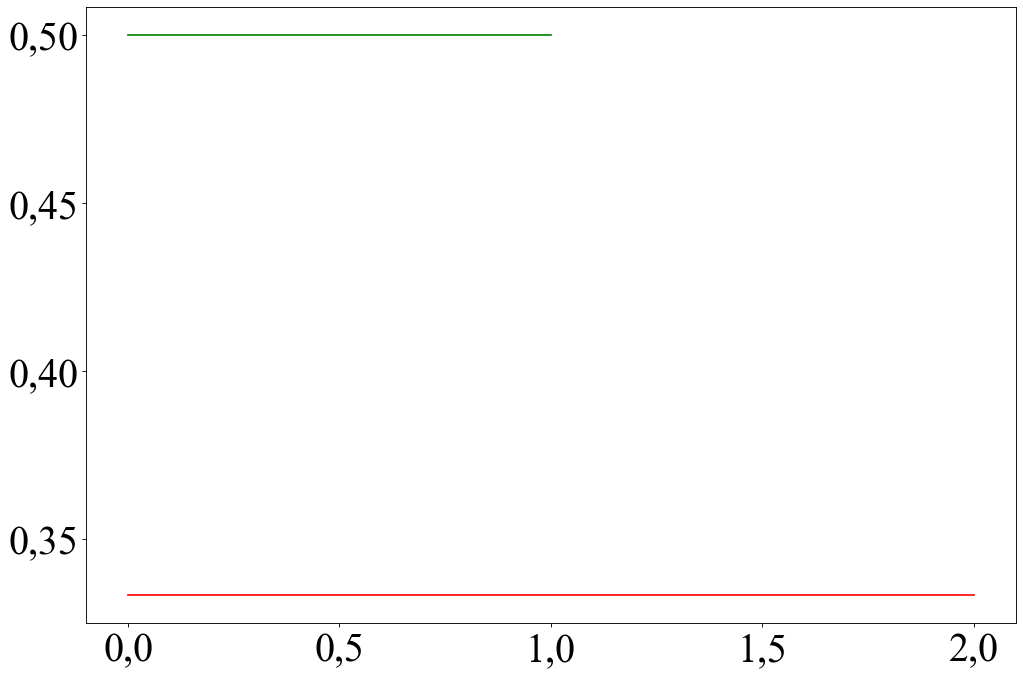

In [ ]:
Y2 = rv_discrete(name='Y2', values=(y2, py2))
Y3 = rv_discrete(name='Y3', values=(y3, py3))
rcParams['figure.figsize'] = (15, 10)
rcParams['figure.dpi'] = 80
plt.plot(y3, py3, color='red')
plt.plot(y2,py2, color='green')
plt.show()

In [ ]:
f = 0
for i in range(2):
    for j in range(3):
        p23 = 0

        for k in range(6):
            if x[k]%2==i and x[k]%3==j:
                p23 += X.pmf(x[k])

        
        p2 = Y2.pmf(i)
        p3 = Y3.pmf(j)

        if p23!=p2*p3:
            f = f'p23({i}, {j}) != p2({i})*p3({j})'
            break
        
if f:
    print(f'Случайные величины зависимы! {f}')

else:
    print('Случайные величины независимы!')

Случайные величины независимы!


## B

In [ ]:
A = 1/21
px = [i*A for i in range(1, 6+1)]
X = rv_discrete(name='X', values=(x, px))

y2 = []
y3 = []
py2 = []
py3 = []

for m in range(3):
    prob2 = 0
    prob3 = 0

    for i in range(6):
        if x[i]%2==m:
            prob2 += X.pmf(x[i])

        if x[i]%3==m:
            prob3 += X.pmf(x[i])

    if m<2:
        y2.append(m)
        py2.append(prob2)
    
    y3.append(m)
    py3.append(prob3)

y2, py2, y3, py3

In [ ]:
fiv_t1=pd.DataFrame(np.array([y2,py2]), index=['Y1','P(Y1)'])
fiv_t2=pd.DataFrame(np.array([y3,py3]), index=['Y2','P(Y2)'])
pd.concat([fiv_t1,fiv_t2])

,0,1,2
Y1,0.000000,1.000000,NaN
P(Y1),0.571429,0.428571,NaN
Y2,0.000000,1.000000,2.000000
P(Y2),0.428571,0.238095,0.333333


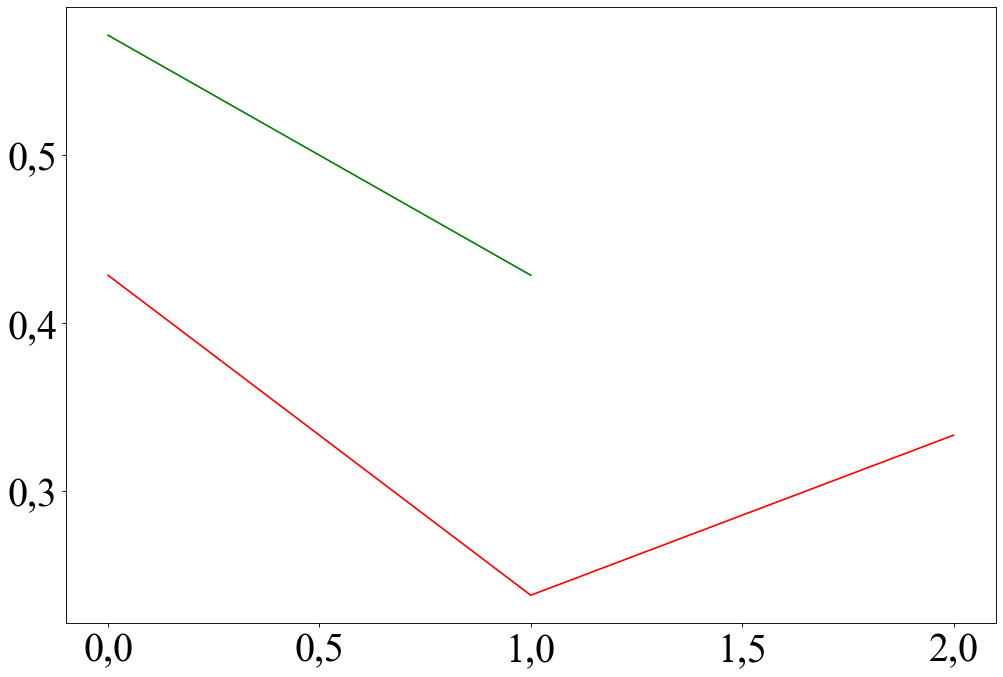

In [ ]:
Y2 = rv_discrete(name='Y2', values=(y2, py2))
Y3 = rv_discrete(name='Y3', values=(y3, py3))

rcParams['figure.figsize'] = (15, 10)
rcParams['figure.dpi'] = 80
plt.plot(y3, py3, color='red')
plt.plot(y2,py2, color='green')
plt.show()

In [ ]:
f = 0
for i in range(2):
    for j in range(3):
        p23 = 0

        for k in range(6):
            if x[k]%2==i and x[k]%3==j:
                p23 += X.pmf(x[k])

        
        p2 = Y2.pmf(i)
        p3 = Y3.pmf(j)

        if p23!=p2*p3:
            f = f'p23({i}, {j}) != p2({i})*p3({j})'
            break
        
if f:
    print(f'Случайные величины зависимы! {f}')

else:
    print('Случайные величины независимы!')

Случайные величины зависимы! p23(1, 0) != p2(1)*p3(0)


# 5.3

## A

In [ ]:
x = np.arange(12+1)
y = np.arange(13+1)
z = np.array([3, 7])

px = np.full(13,1/13)
py = np.full(14,1/14)
pz = [9/10, 1/10]

X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))



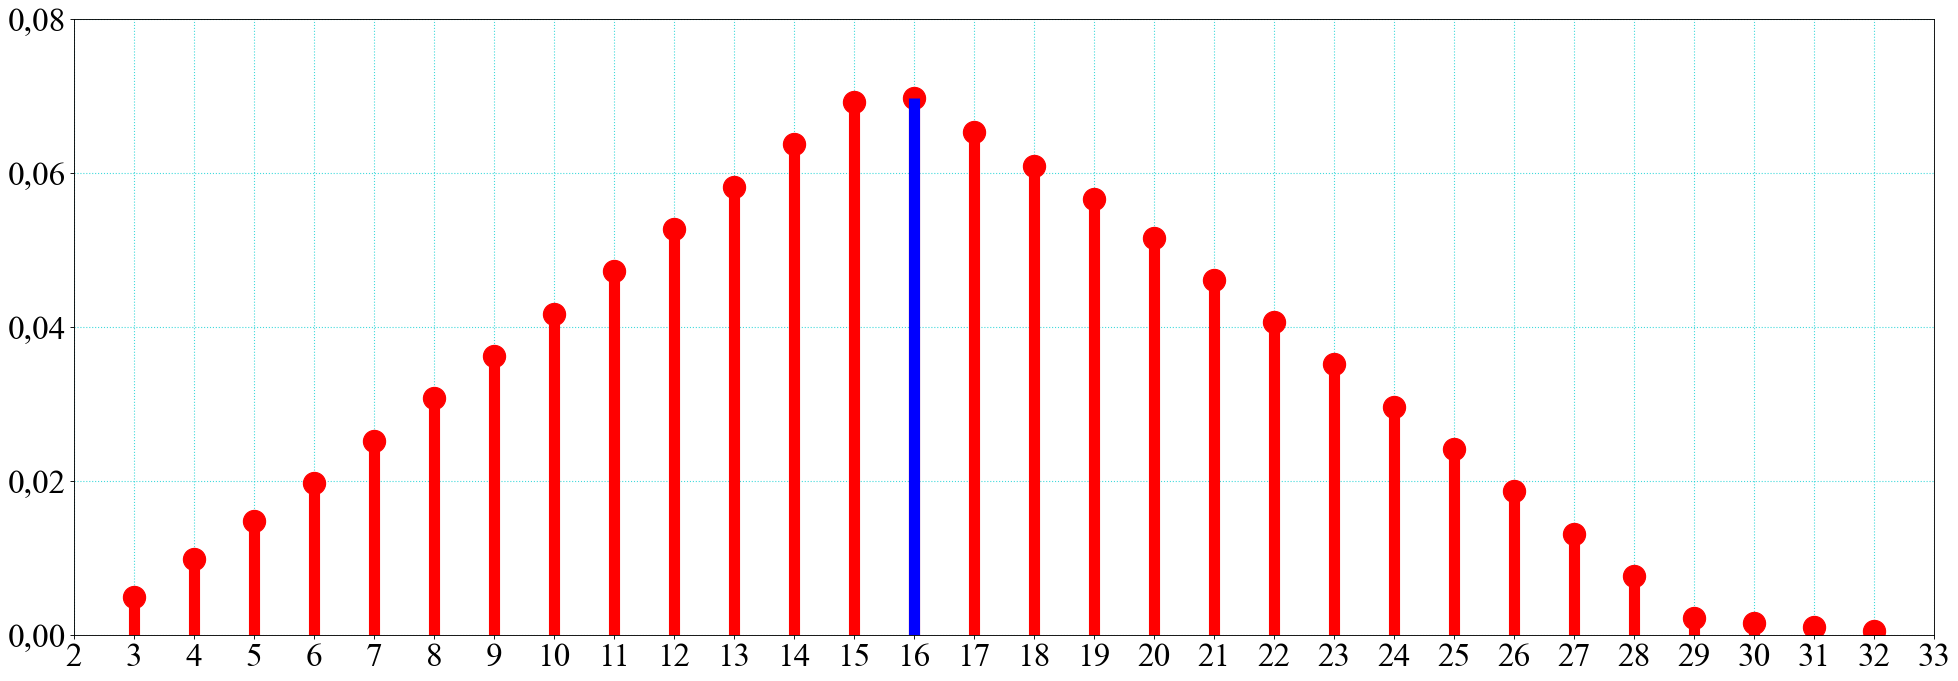

In [ ]:
n = []
pn = []

for m in range(3, 33):
    p = 0
    for i in range(0,13): 
        for j in range(0,14): 
            for k in range(0,2): 
                if x[i]+y[j]+z[k] == m: 
                    p+=X.pmf(x[i])*Y.pmf(y[j])*Z.pmf(z[k])
    n.append(m)
    pn.append(p)

N = rv_discrete(name='N', values=(n, pn))

fig,ax =plt.subplots(figsize=(30, 10))
plt.tick_params(labelsize = 30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
plt.ylim(0,0.08)
plt.xlim(2,33)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.plot(n, N.pmf(n), 'ro', ms=20, mec='r')
ax.vlines(n, 0, N.pmf(n), colors='r', lw=10)

ax.vlines(n[pn.index(max(pn))], 0, N.pmf(n[pn.index(max(pn))]), colors='b', lw=10)
plt.show()
pA = N.pmf(12)
pA

In [ ]:
matrix = {n[i]: pn[i] for i in range(len(pn))}
matr = pd.DataFrame([n,pn])
matr

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.000000,4.00000,5.000000,6.00000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,...,23.000000,24.00000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000
1,0.004945,0.00989,0.014835,0.01978,0.025275,0.030769,0.036264,0.041758,0.047253,0.052747,...,0.035165,0.02967,0.024176,0.018681,0.013187,0.007692,0.002198,0.001648,0.001099,0.000549


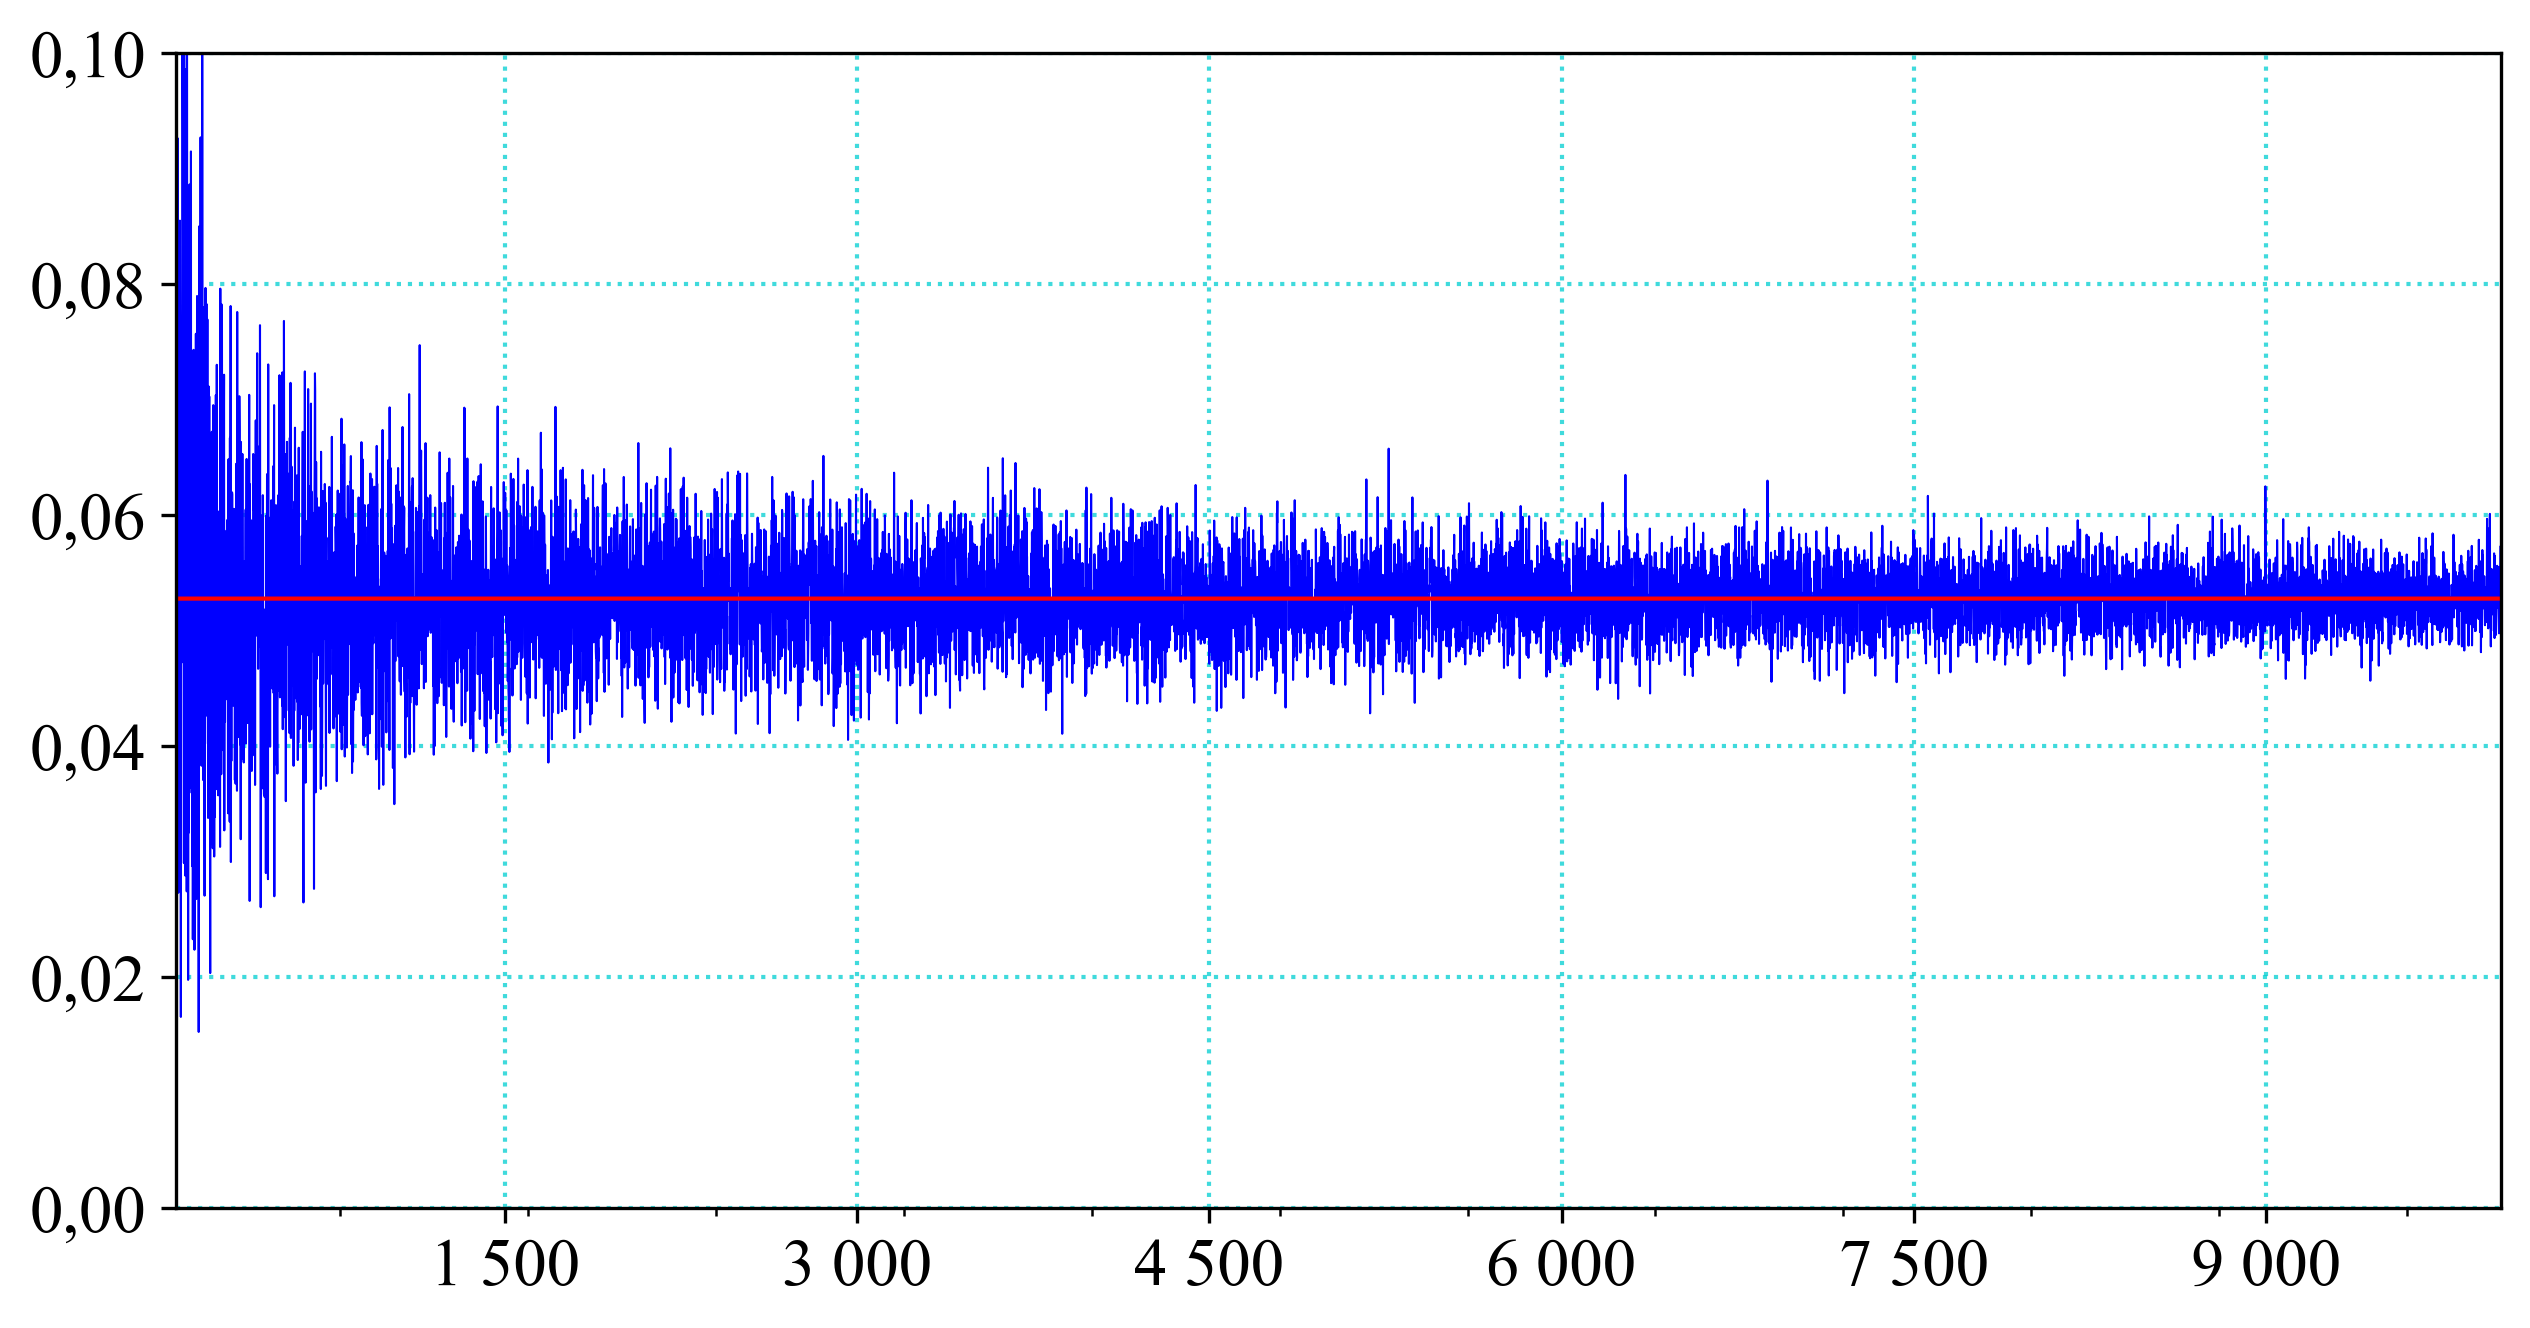

In [ ]:
Q = 10000

y = [list(N.rvs(size=_)).count(12)/_ for _ in range(1, Q+1)]
x = list(range(1, Q+1))
pA_stat = y[-1]/Q

rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))
plt.ylim(0.0, 0.1)
plt.xlim(100, Q)
################################################################################################
plt.plot(x, y, color='b', lw=0.5)
plt.plot(x, [pA]*len(x), color='r', lw=1)
plt.show()

## B

In [ ]:
matr[[13]]

,13
0,16.00000
1,0.06978


## C

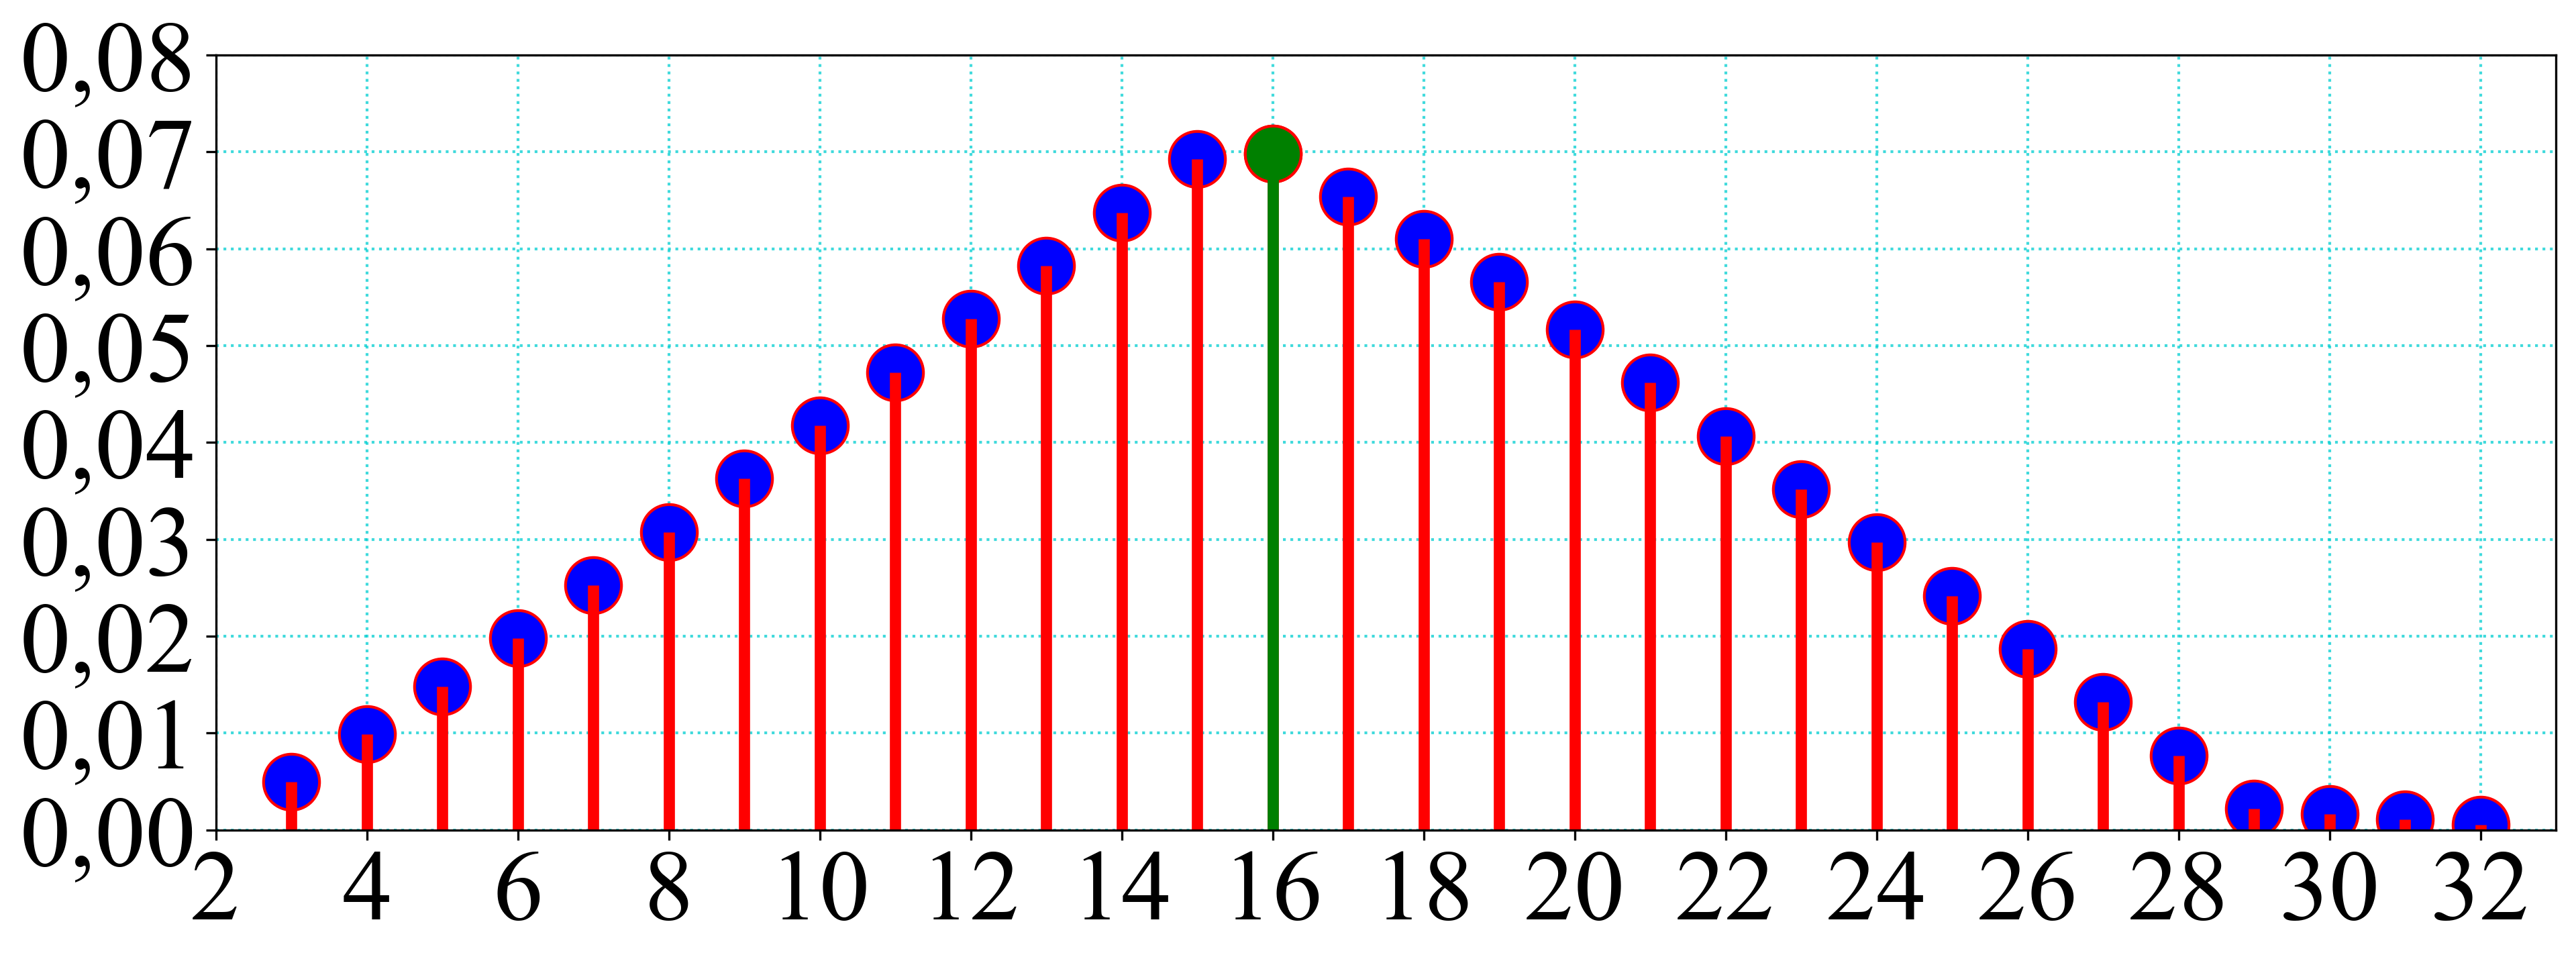

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.ylim(0, 0.08)
plt.xlim(2, 33)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.plot(n, N.pmf(n), 'bo', ms=20, mec='r')
ax.vlines(n, 0, N.pmf(n), colors='r', lw=4)
ax.plot(16, N.pmf(16), 'go', ms=20, mec='r')
ax.vlines(16, 0, N.pmf(16), colors='g', lw=4)
plt.show()

# 5.4

# 5.5

In [ ]:
x = list(range(1, 8))
y = list(range(1, 15))
z = [7, 14]

px = np.full(7,1/7)
py = np.full(14,1/14)
pz = [3/5, 2/5]

X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

In [ ]:
w = []
pw = []

for m in range(9, 35+1):
    prob = 0

    for i in range(7):
        for j in range(14):
            for k in range(2):

                if x[i]+y[j]+z[k]==m:
                    prob += X.pmf(x[i])*Y.pmf(y[j])*Z.pmf(z[k])

    w.append(m)
    pw.append(prob)

W = rv_discrete(name='W', values=(w, pw))
p = 1 - W.cdf(28)
print(W.cdf(21))

0.5142857142857142


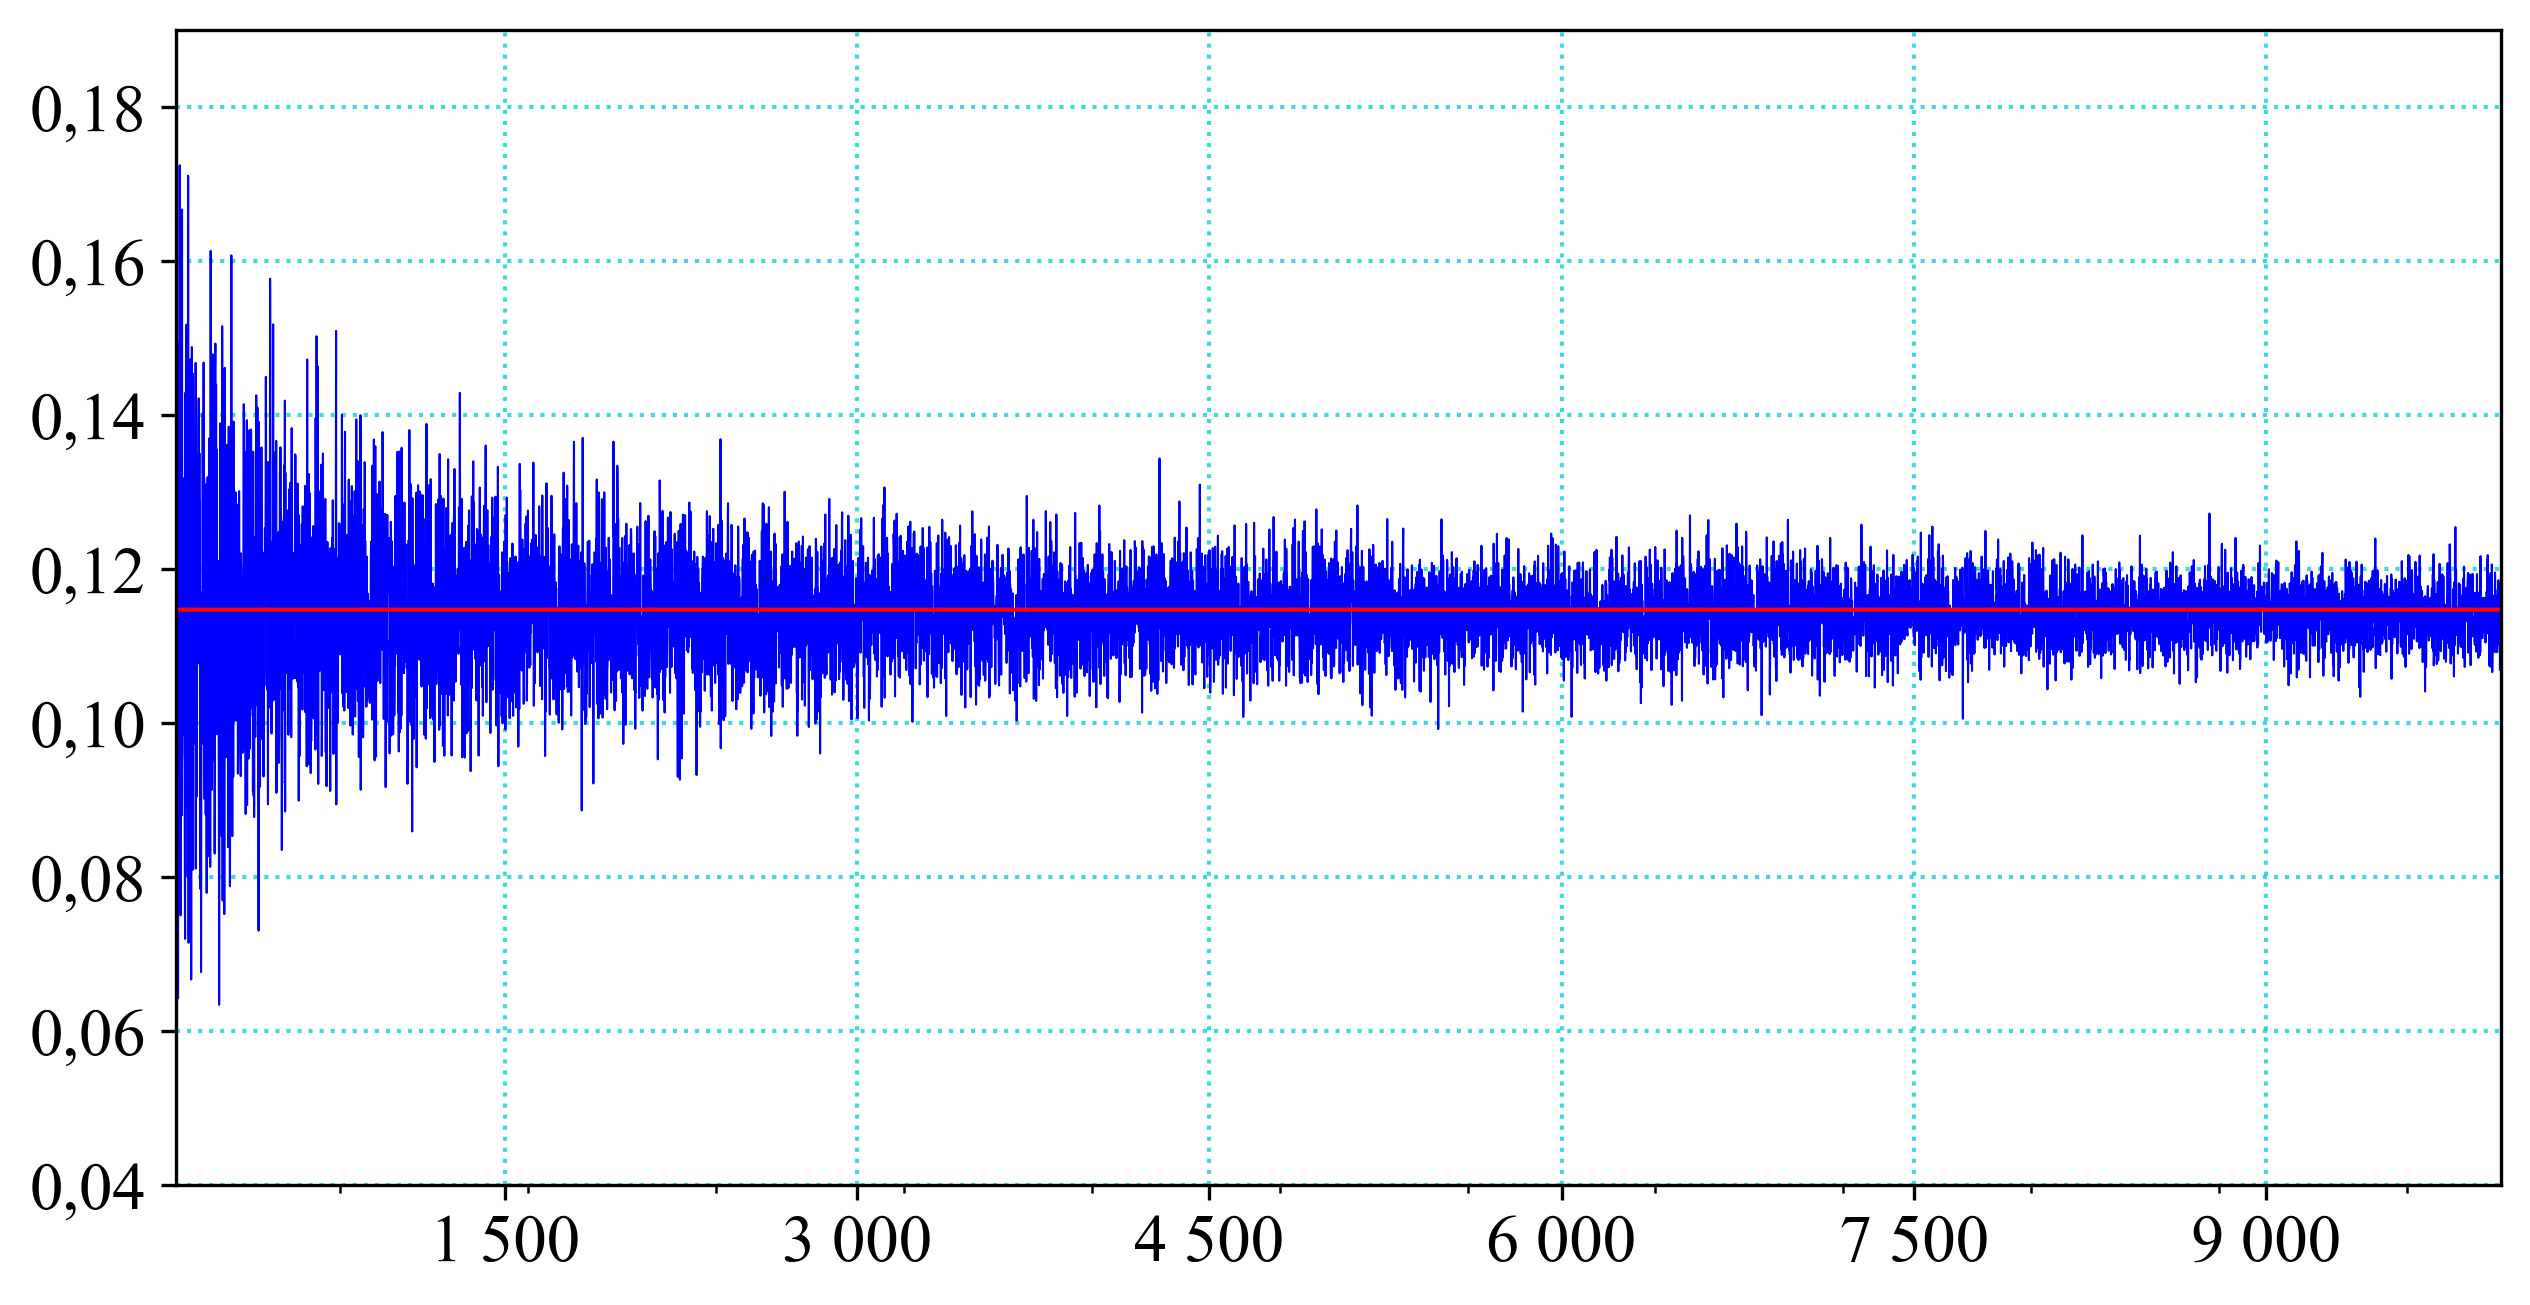

In [ ]:
N = 10000
x = list(range(1, N+1))
y = [len(list(filter(lambda _: _>=29, W.rvs(size=n))))/n for n in range(1, N+1)]
huk = y[-1]
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))
plt.ylim(0.04, 0.19)
plt.xlim(100, N)
################################################################################################
plt.plot(x, y, color='b', lw=0.5)
plt.plot(x, [huk]*len(x), color='r', lw=1)

plt.show()

In [ ]:
y[-1]

## A

In [ ]:
x = list(range(1, 16))
y = list(range(1, 13))
z = list(range(1, 12))

px = np.full(15,1/15)
py = np.full(12,1/12)
pz = np.full(11,1/11)

X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

In [ ]:
w = []
pw = []

for m in range(0, 2):
    prob = 0

    for i in range(15):
        for j in range(12):
            for k in range(11):

                if (x[i]<y[j]<z[k])*1==m:
                    prob += X.pmf(x[i])*Y.pmf(y[j])*Z.pmf(z[k])
                
    w.append(m)
    pw.append(prob)

W = rv_discrete(name='W', values=(w, pw))
p_A = W.pmf(1)
p_A

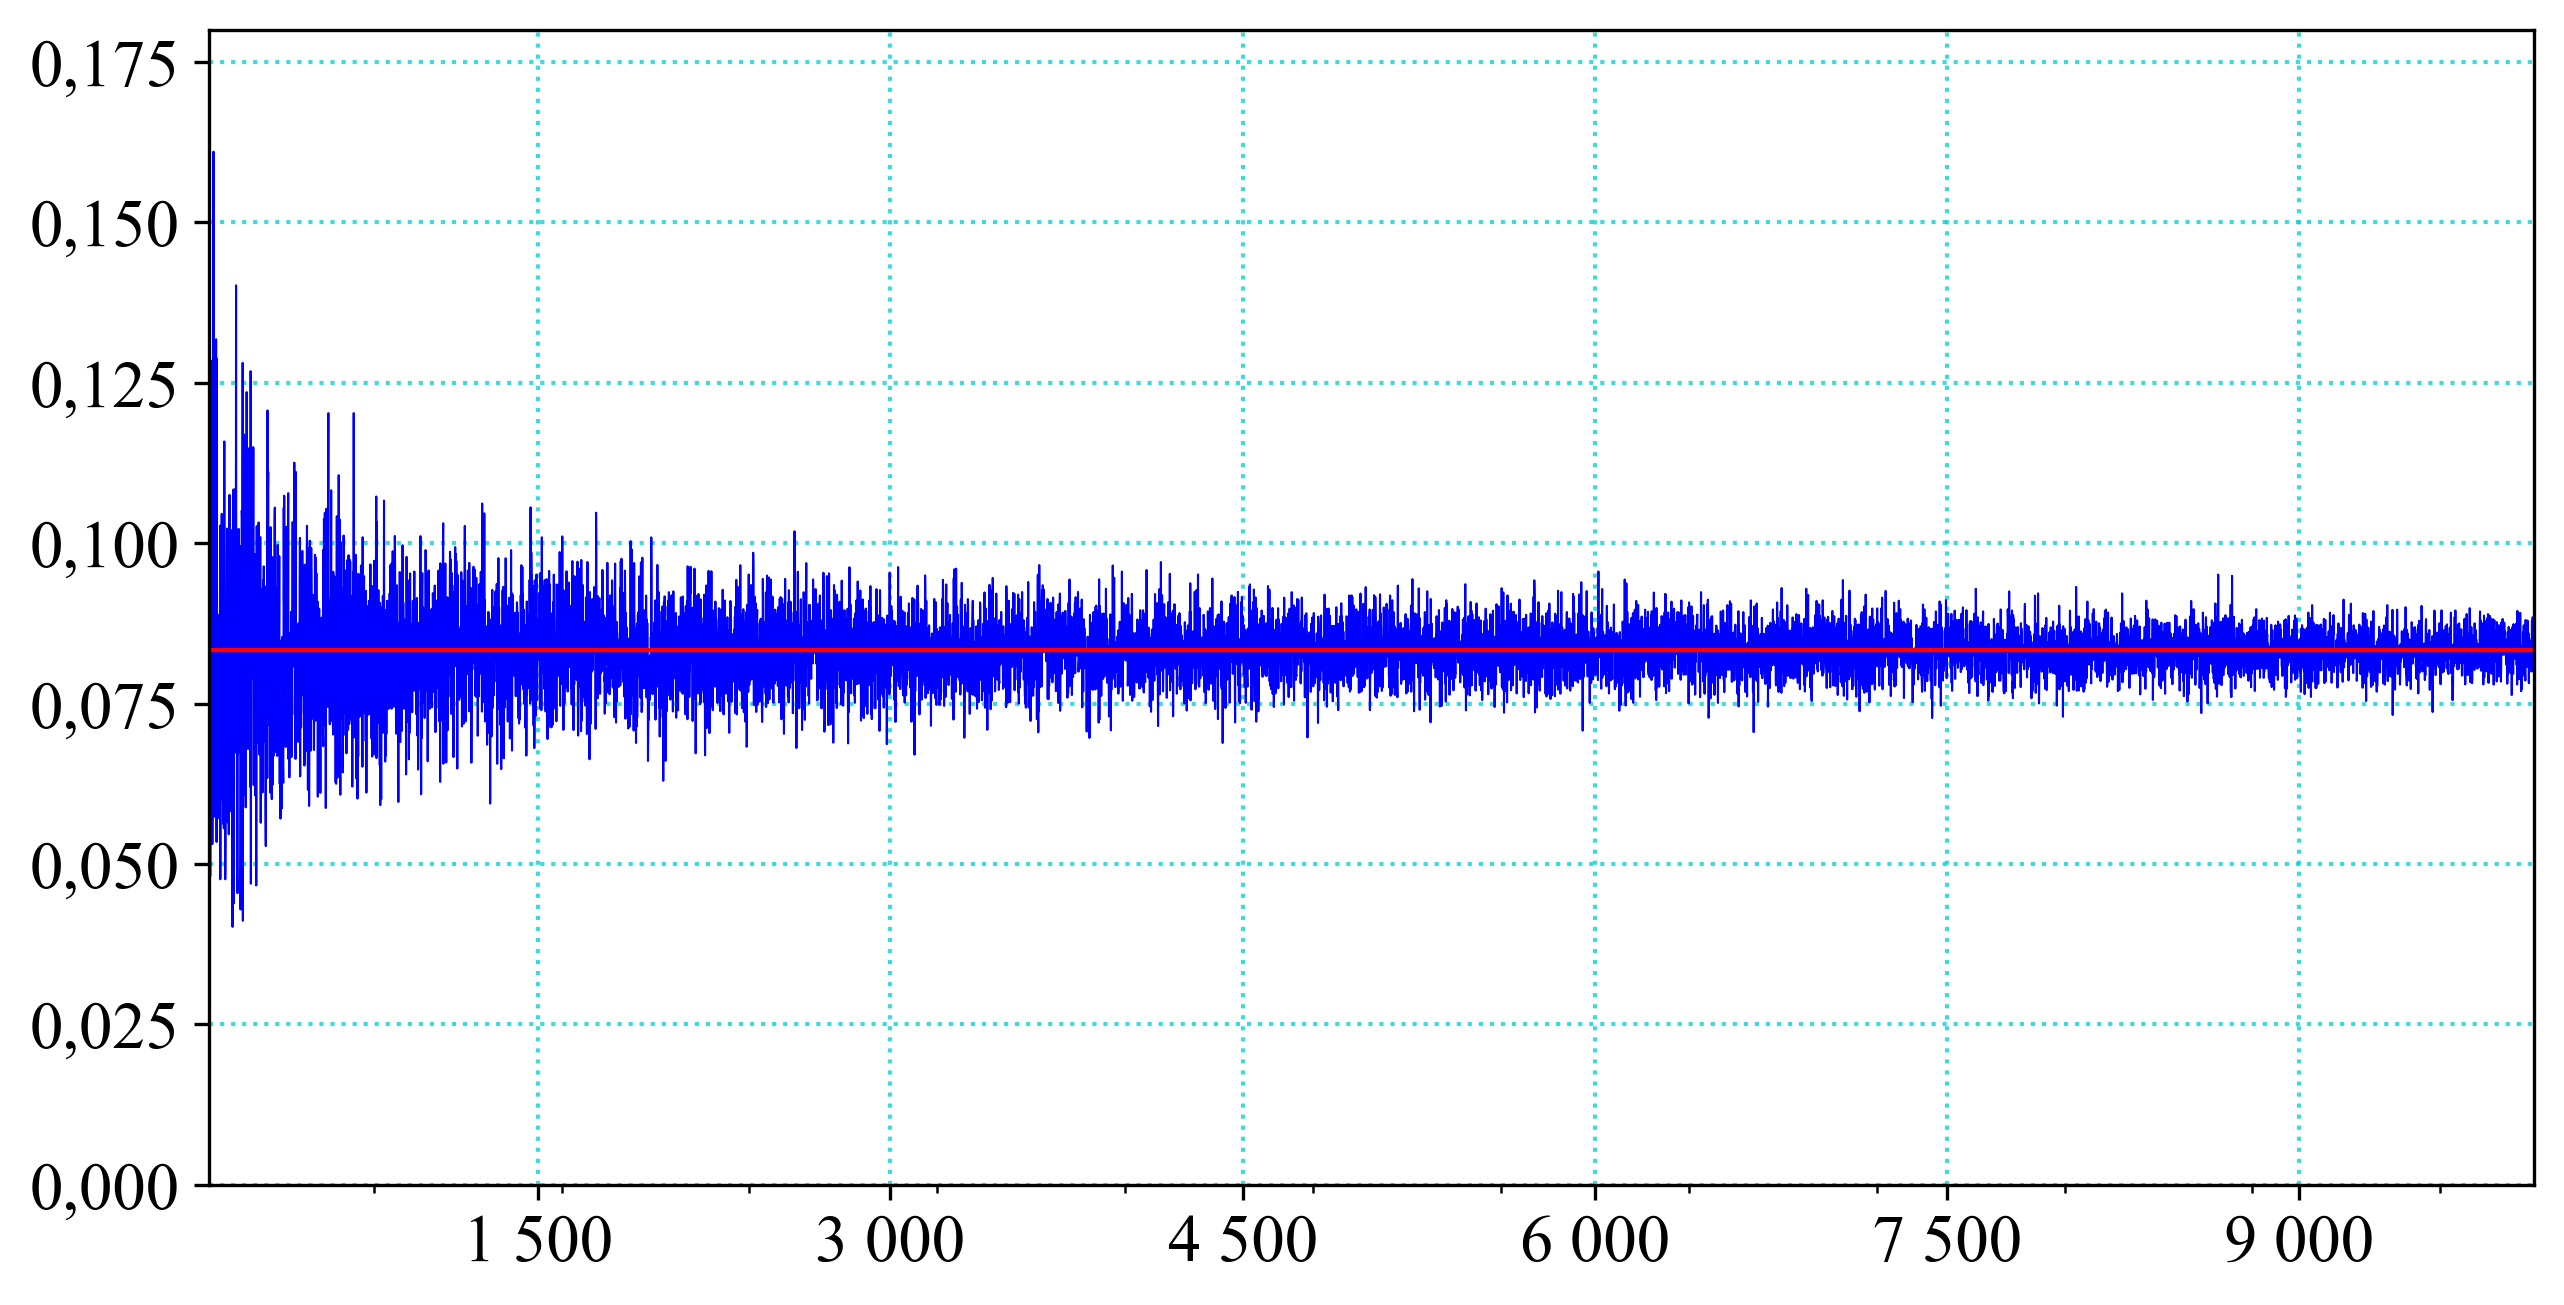

In [ ]:
N = 10000
y = [list(W.rvs(size=n)).count(1)/n for n in range(1, N+1)]
x = list(range(1, N+1))

rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))
plt.ylim(0.0, 0.18)
plt.xlim(100, N)
################################################################################################
plt.plot(x, y, color='b', lw=0.5)
plt.plot(x, [p_A]*len(x), color='r', lw=1)

plt.show()

## B

In [ ]:
x = list(range(1, 16))
y = list(range(1, 13))
z = list(range(1, 12))

px = np.full(15,1/15)
py = np.full(12,1/12)
pz = np.full(11,1/11)

X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

In [ ]:
wb = []
pwb = []

for m in range(0, 2):
    prob = 0

    for i in range(15):
        for j in range(12):
            for k in range(11):

                if (2*x[i] < y[j] < 2*z[k])==m:
                    prob += X.pmf(x[i])*Y.pmf(y[j])*Z.pmf(z[k])
                
                
    wb.append(m)
    pwb.append(prob)
print(pwb)
Wb = rv_discrete(name='Wb', values=(wb, pwb))
p_B = Wb.pmf(1)
p_B

[0.8964646464646084, 0.103535353535354]


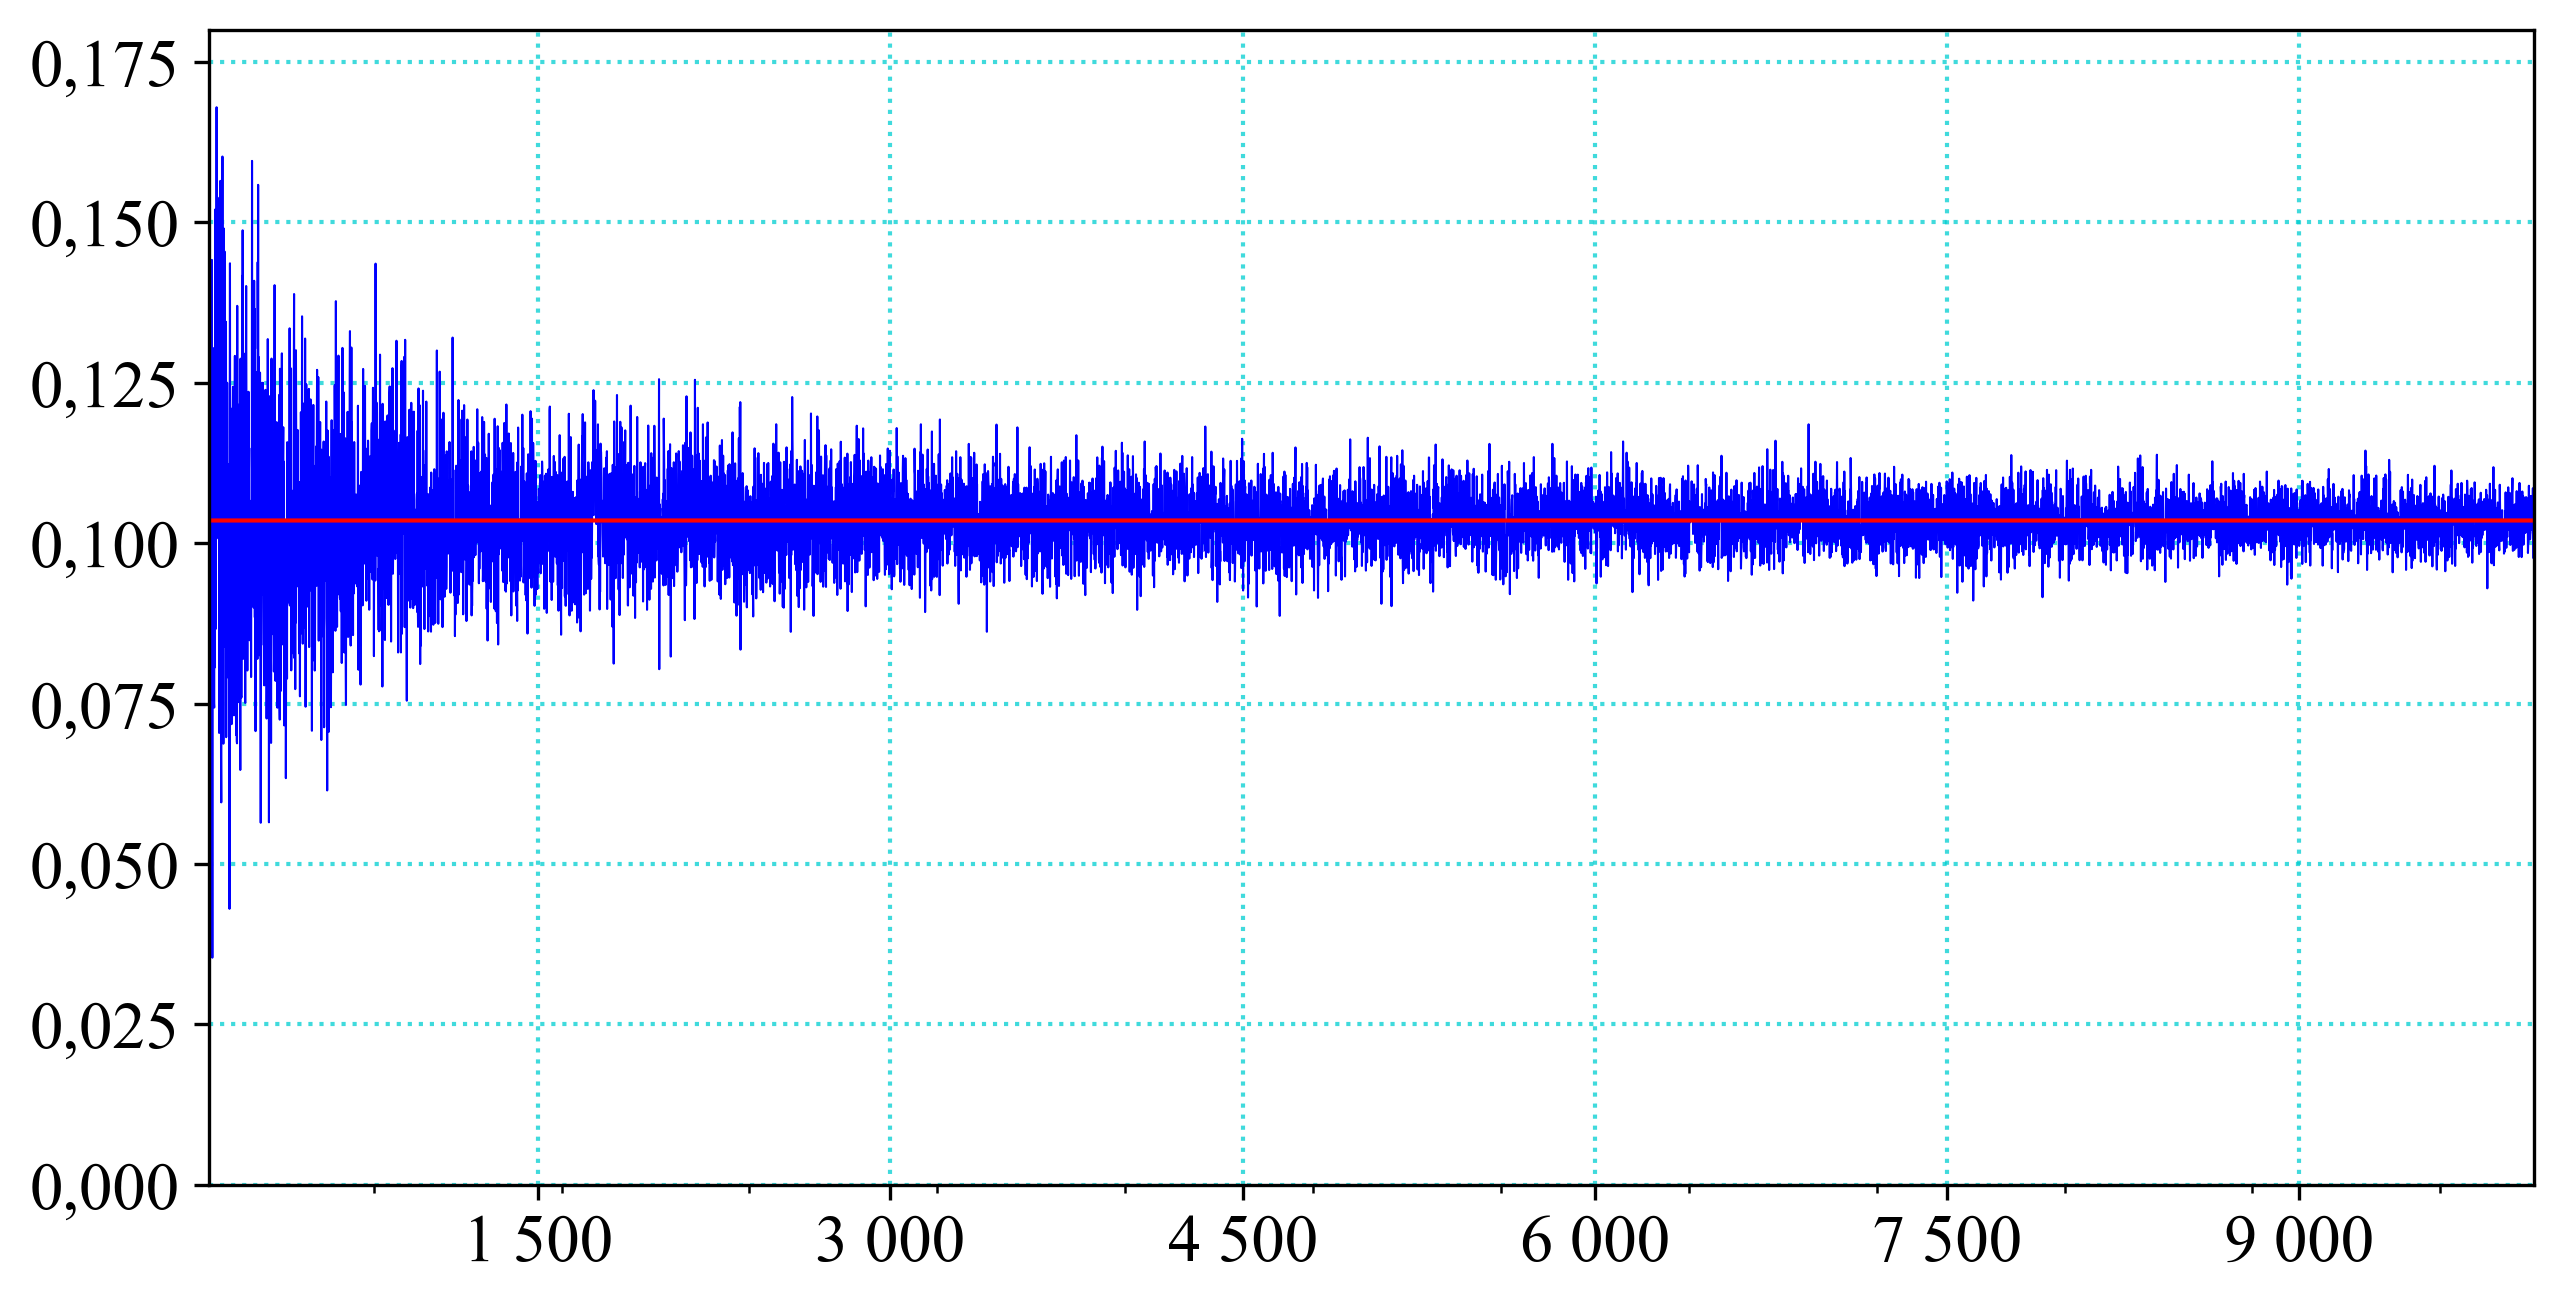

: 

In [ ]:
N = 10000
y = [list(Wb.rvs(size=n)).count(1)/n for n in range(1, N+1)]
x = list(range(1, N+1))

rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))
plt.ylim(0.0, 0.18)
plt.xlim(100, N)
################################################################################################
plt.plot(x, y, color='b', lw=0.5)
plt.plot(x, [p_B]*len(x), color='r', lw=1)

plt.show()

# 5.6


In [ ]:
X= dict()
for i in range(1,10):
    X[i] = rv_discrete(name=f'X{i}', values=(list(range(0,i+1)),[1/(i+1) for _ in range(i+1)]))
X

{1: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab13d210>,
 2: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab13ded0>,
 3: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab152490>,
 4: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab1501d0>,
 5: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab150ed0>,
 6: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab151bd0>,
 7: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab151710>,
 8: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab150f50>,
 9: <scipy.stats._distn_infrastructure.rv_sample at 0x2c8ab153450>}

In [ ]:
w = [0,1]
pw = [0,0]
prob = 0
for a in range(2):
            for b in range(3):
                for c in range(4):
                    for d in range(5):
                        for e in range(6):
                            for f in range(7):
                                for g in range(8):
                                    for h in range(9):
                                        for i in range(10):
                                            cur = [a,b,c,d,e,f,g,h,i]
                                            mlt = 1*(ft.reduce(lambda x,y:x*y,cur)==0)
                                            pw[mlt] +=1/math.factorial(10)
W = rv_discrete(name='W', values=(w,pw))
W.pmf(1)

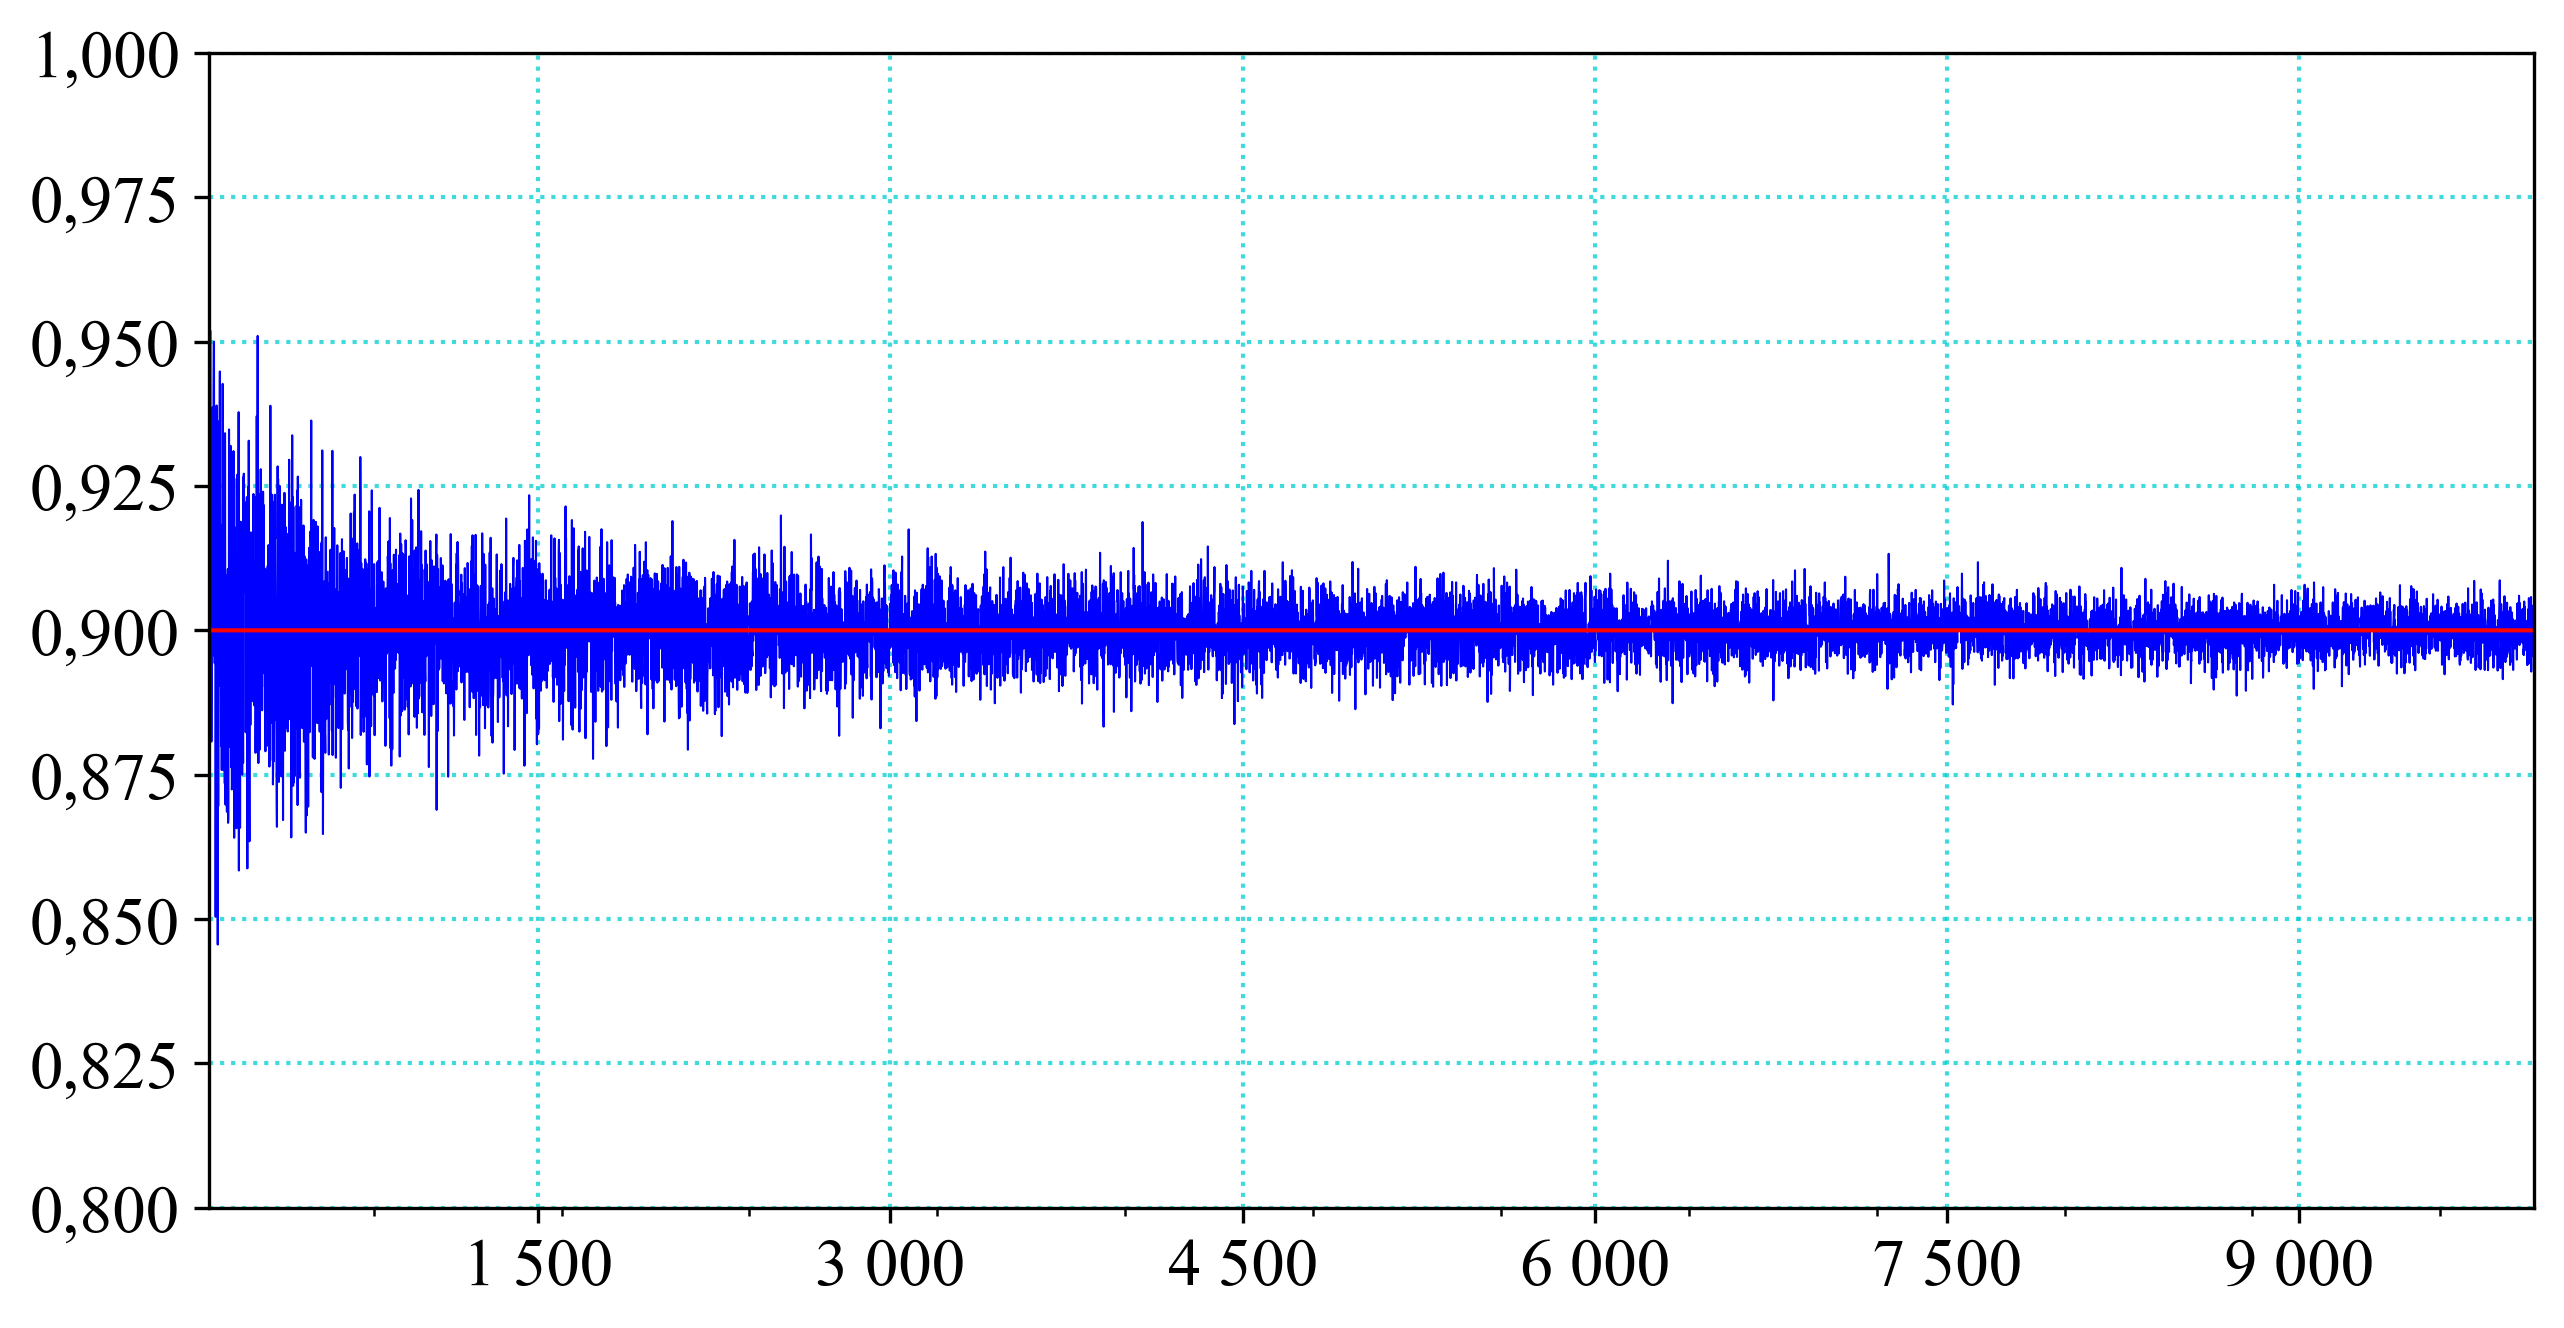

In [ ]:
N = 10000
y = [list(W.rvs(size=n)).count(1)/n for n in range(1, N+1)]
x = list(range(1, N+1))

rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))
plt.ylim(0.8, 1)
plt.xlim(100, N)
################################################################################################
plt.plot(x, y, color='b', lw=0.5)
plt.plot(x, [W.pmf(1)]*N, color='r', lw=1)

plt.show()

# 5.7

In [ ]:
x = list(range(1, 14))
y = list(range(1, 13))
z = list(range(1, 9))

px = [(i+1)/sum(x) for i in range(len(x))]
py = [(i+1)/sum(y) for i in range(len(y))]
pz = [(i+1)/sum(z) for i in range(len(z))]


X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

In [ ]:
n = []
pn = []
p=0
for i in range(0,13): 
    for j in range(0,12): 
        for k in range(0,8): 
            if x[i]!=y[j] and x[i]!=z[k] and y[j]!=z[k]: 
                p+=X.pmf(x[i])*Y.pmf(y[j])*Z.pmf(z[k])
p

  0%|          | 0/100000 [00:00<?, ?it/s]

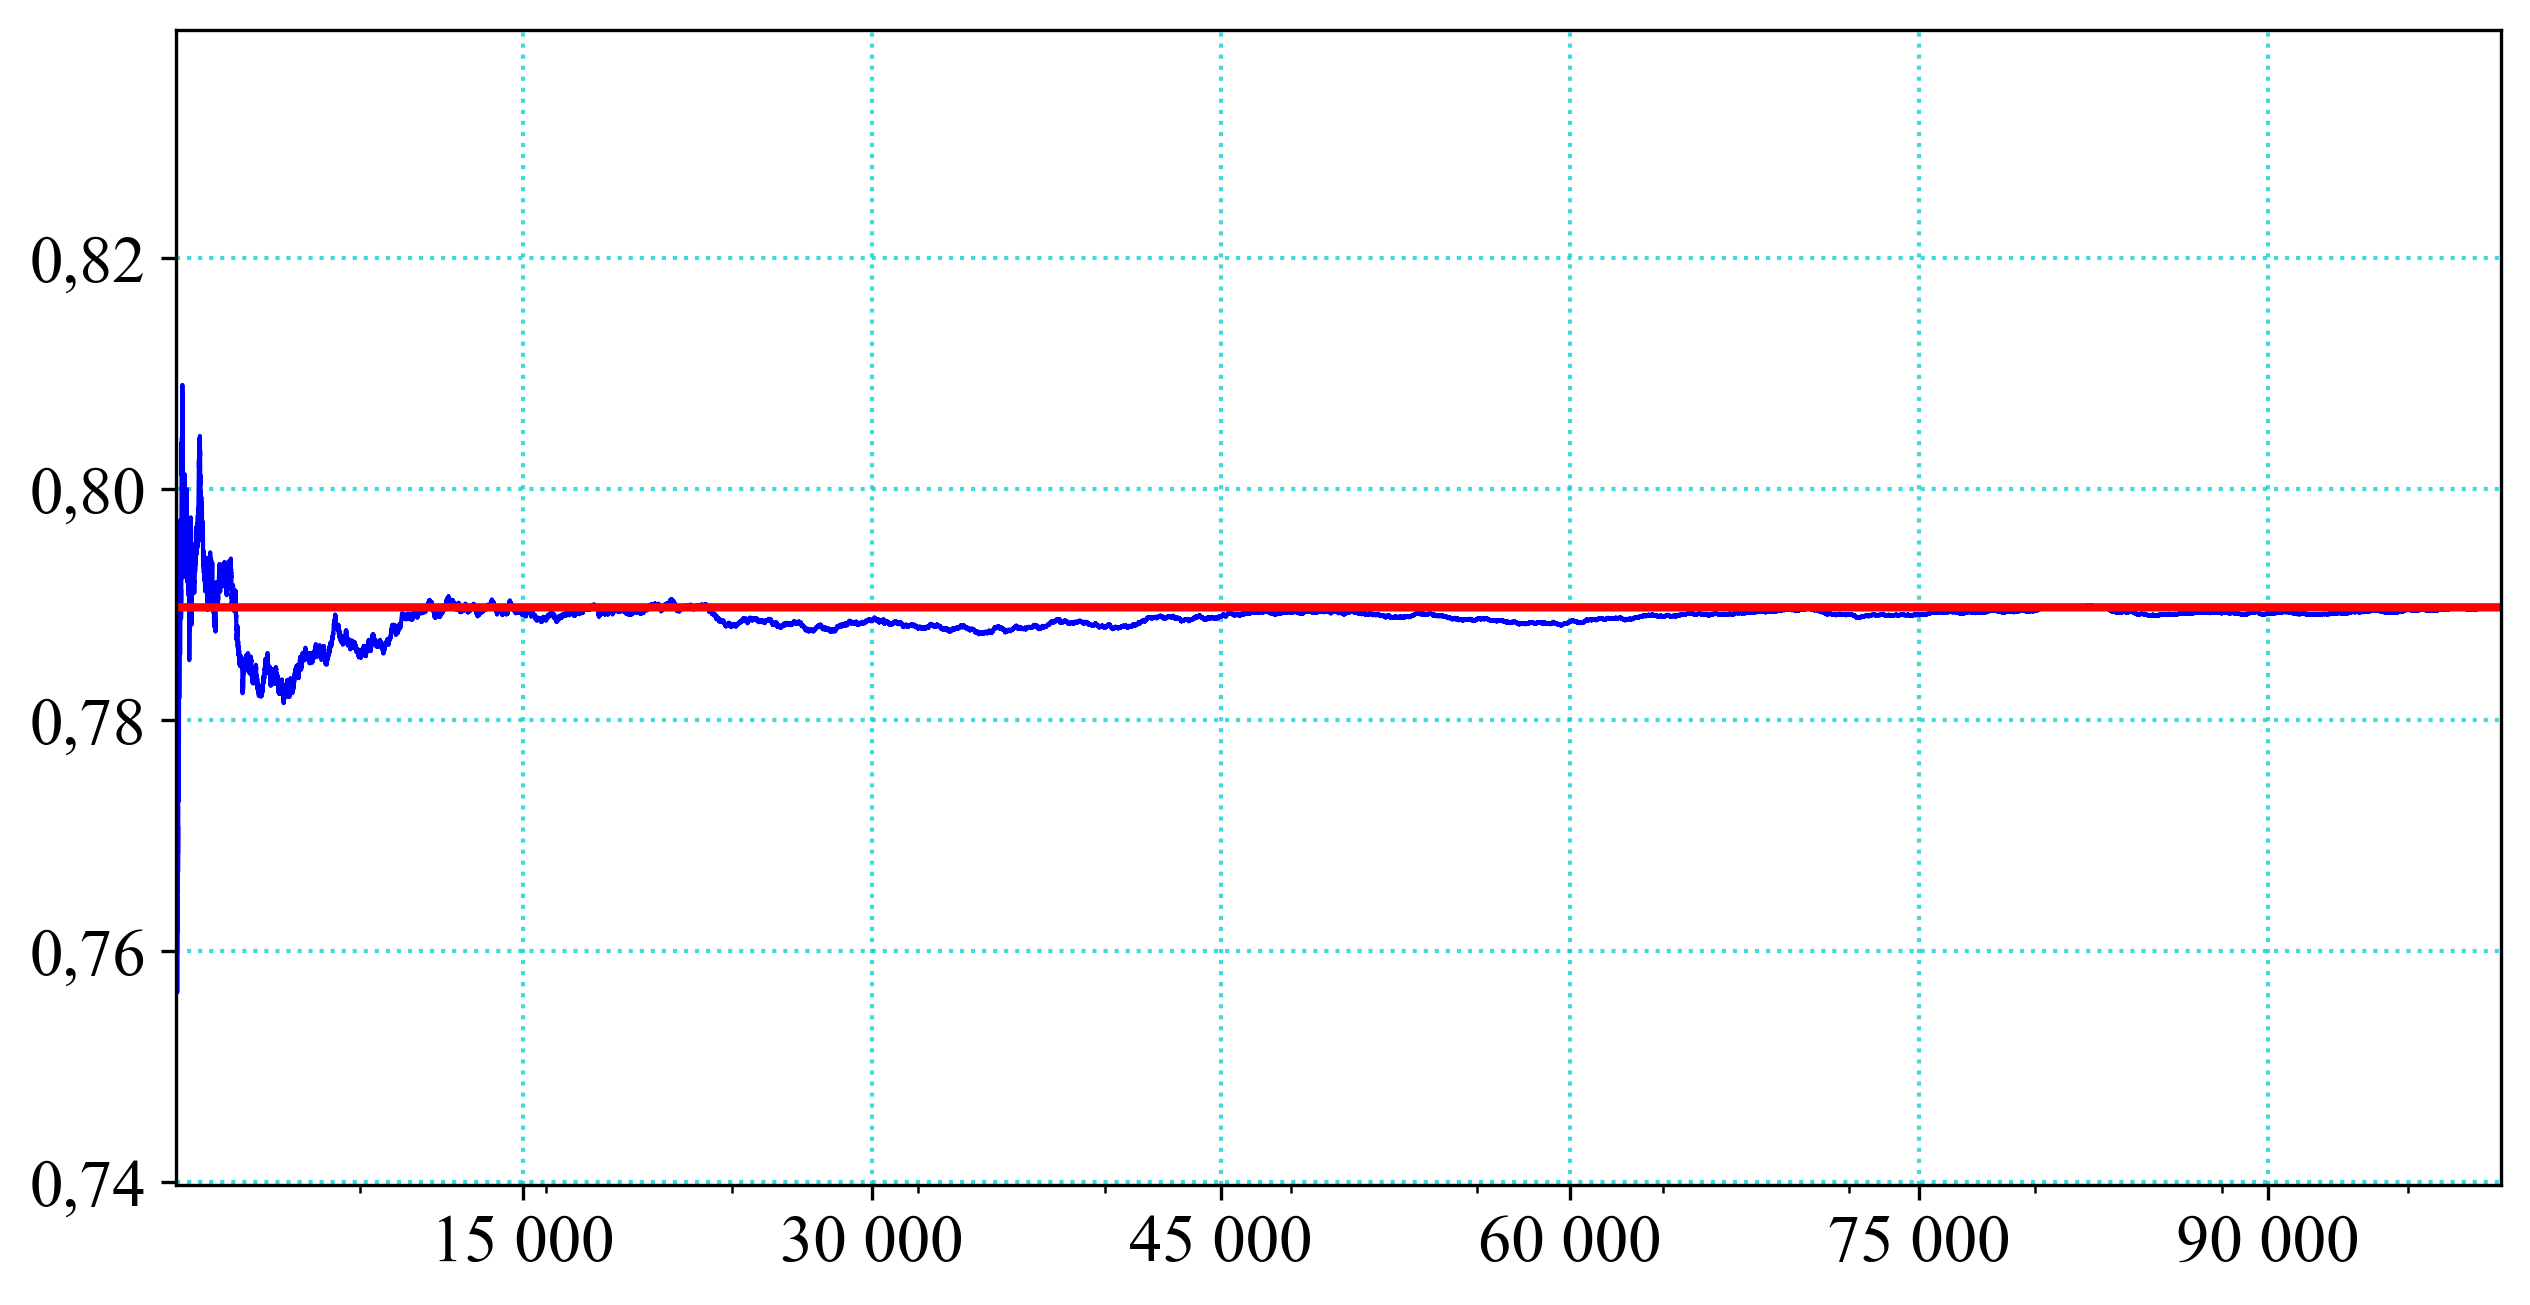

0.78976


In [ ]:
N = 100_000
A = 0
x = []
y = []
for i in tqdm(range(1, N + 1)):
    x.append(i)
    if (X.rvs() != Y.rvs()) and (X.rvs() != Z.rvs()) and (Y.rvs() != Z.rvs()):
        A += 1
    y.append(A/i)
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))
plt.ylim(y[-1]-0.05, y[-1]+0.05)
plt.xlim(100, N)
plt.plot(x, y, color='b', lw=1)
plt.plot(x,[A/N]*len(x),color='r',lw=2)
plt.show()
print(A/N)

# 5.8


In [ ]:
sum([math.comb(40,2*n)*(0.98**(40-(2*n)))*(0.02**(2*n)) for n in range(20)])

In [ ]:
X = rv_discrete(values=([0,1],[0.02,0.98]))

In [ ]:
N=2_000
x = list(range(1,N+1))
y = [[np.array(X.rvs(size=40)).sum()%2 for i in range(1,n+1)].count(0)/n for n in tqdm(range(1,N+1))]

  0%|          | 0/2000 [00:00<?, ?it/s]

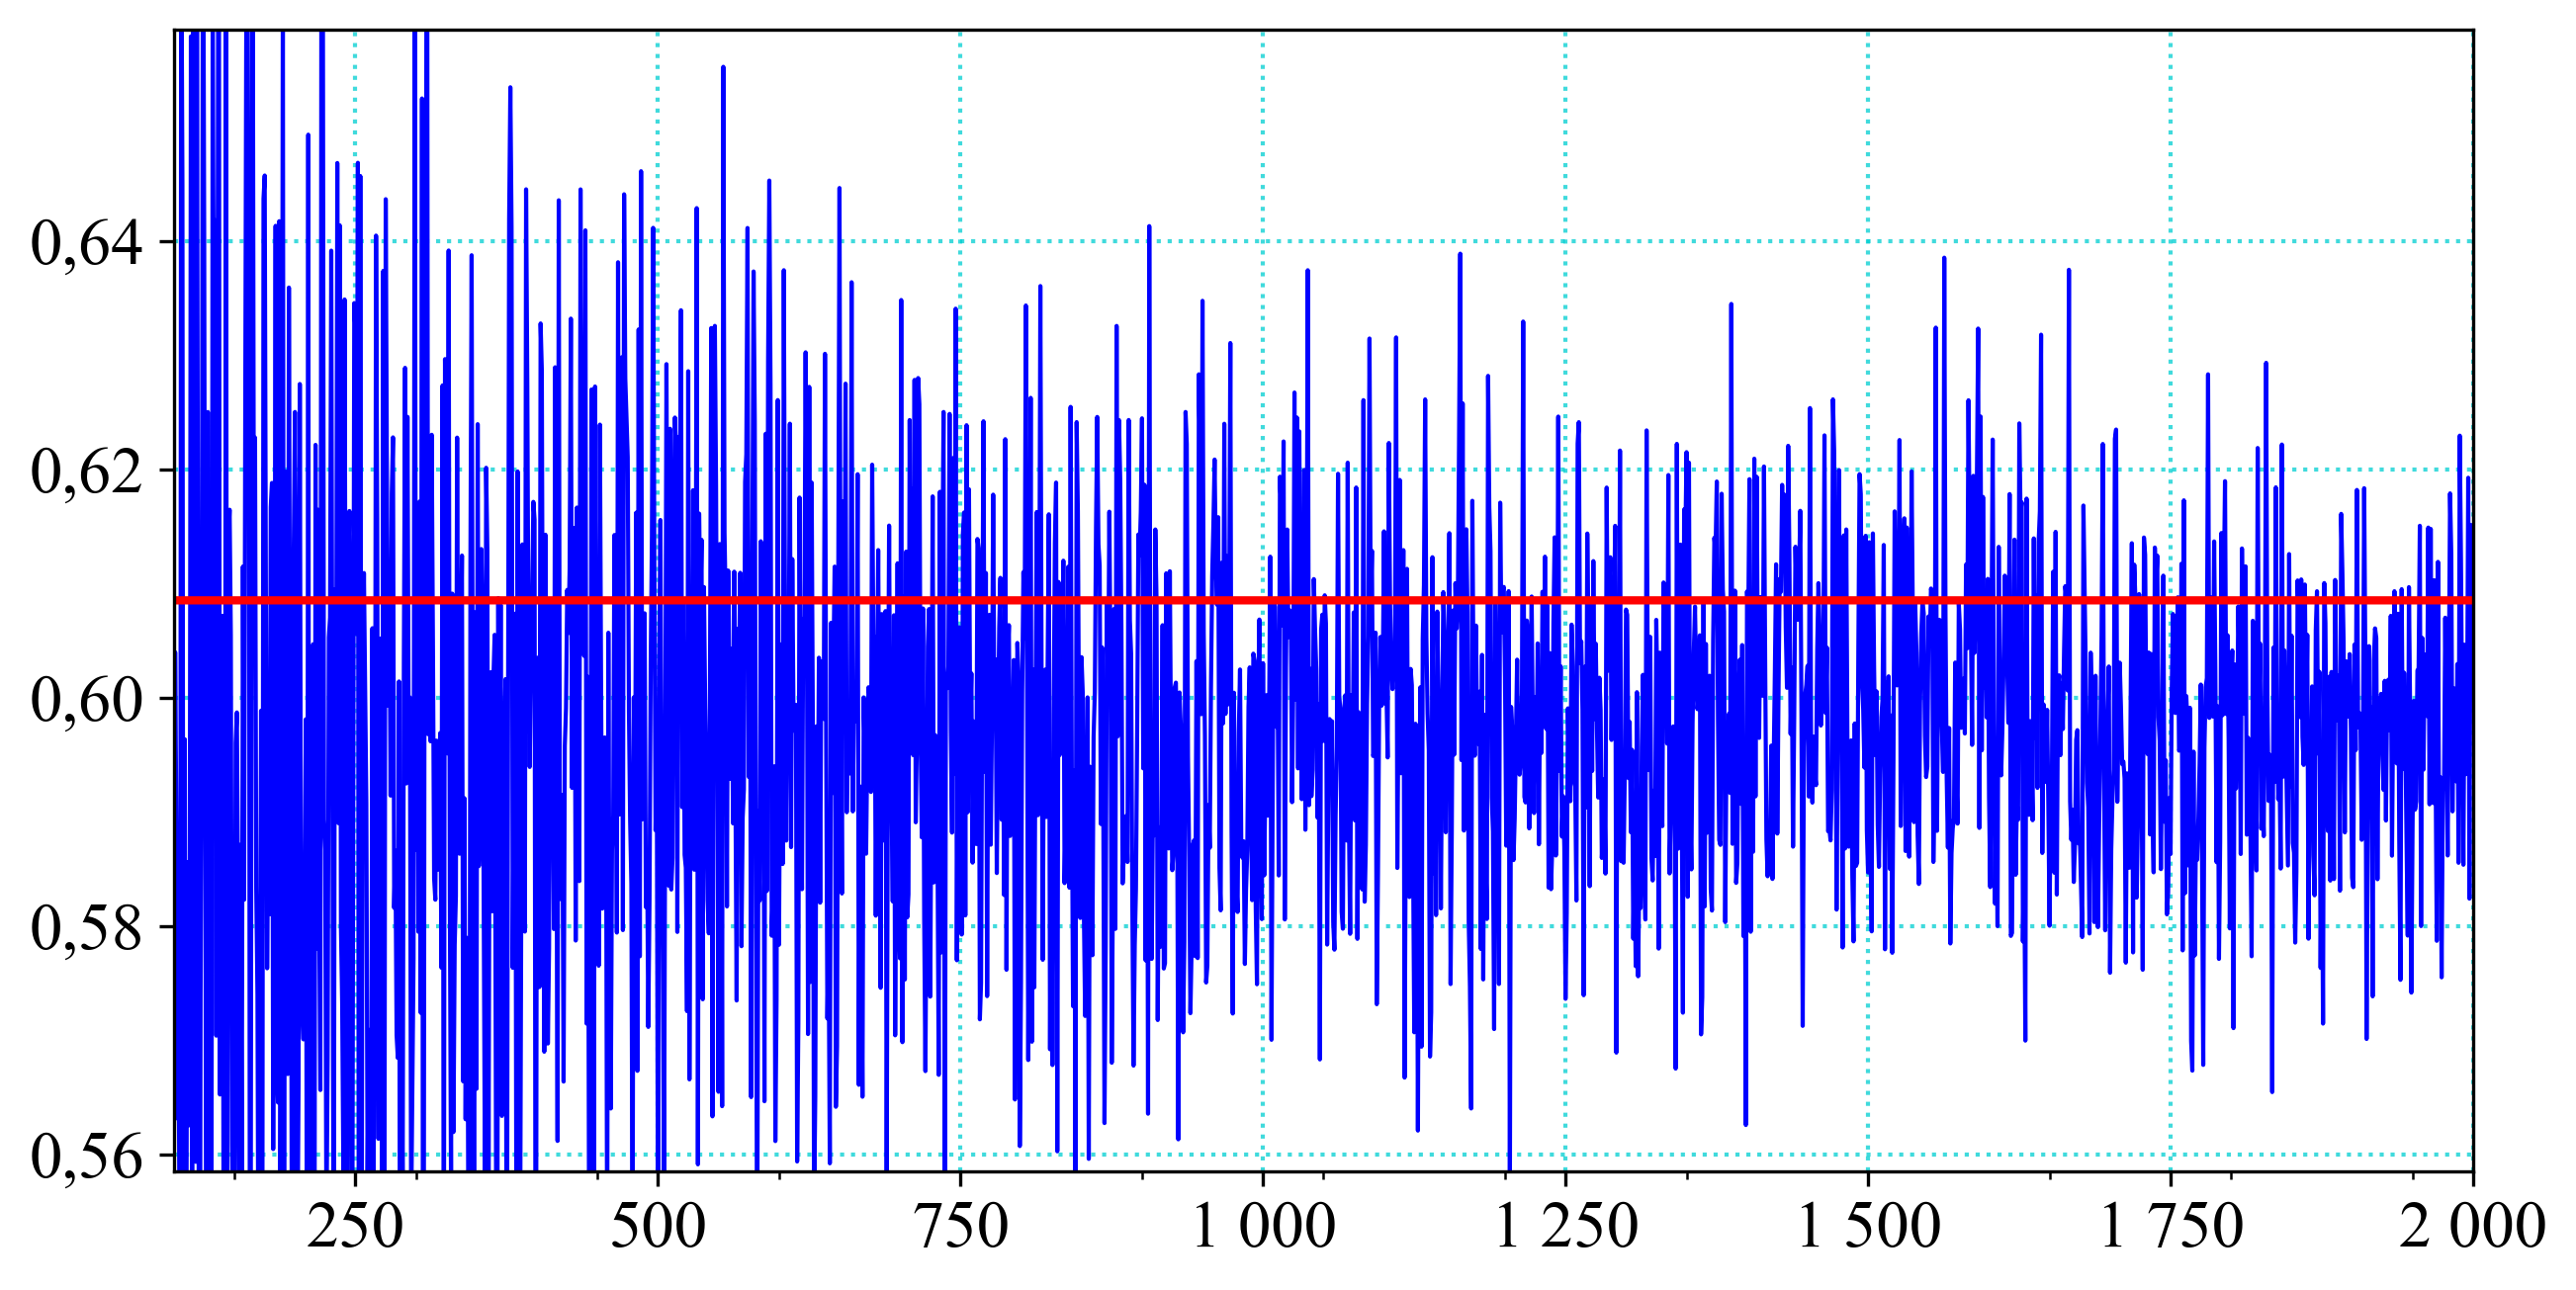

0.6085


In [ ]:
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))

plt.ylim(y[-1]-0.05, y[-1]+0.05)
plt.xlim(100, N)
plt.plot(x, y, color='b', lw=1)
plt.plot(x,[y[-1]]*len(x),color='r',lw=2)
plt.show()
print(y[-1])